# Import the Libraries

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

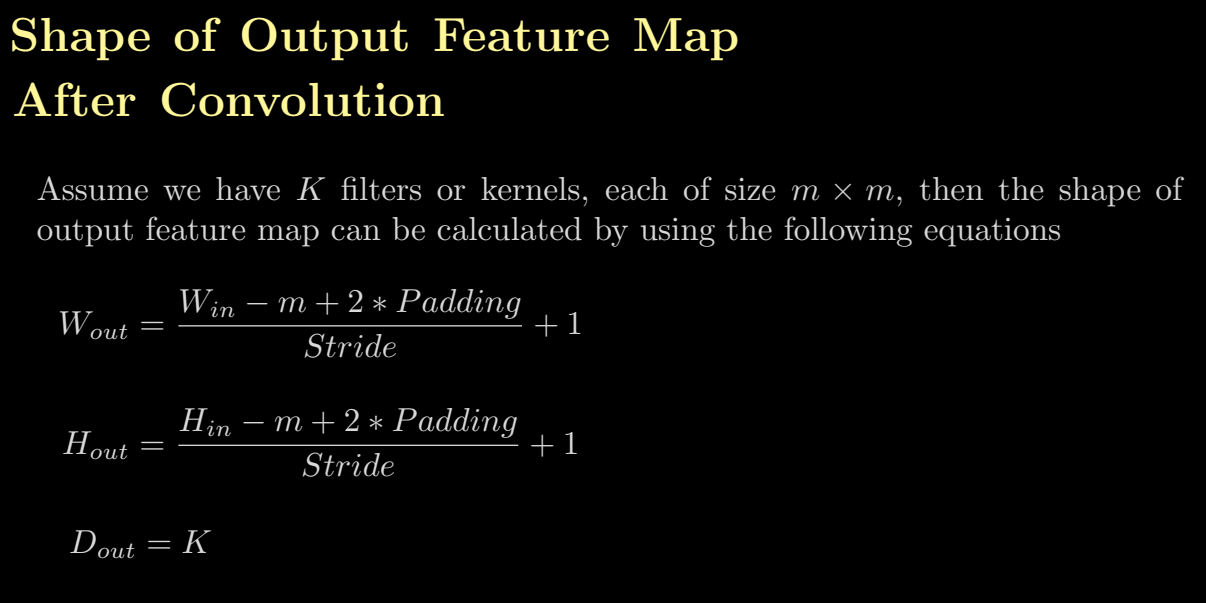

# nn.Conv2d() PyTorch

## size of the image (Number of samples, Channels, width, height)

In [ ]:
img = (1,3,64,64) # Convolutional Layer needs 4D input shape
imgT = torch.rand(img) # torch.randn so that the pixels should be positive and normalized.

## Set the parameters and create the instance of  nn.Conv2d

In [ ]:
in_channels  = 3 # RGB or color image
out_channels = 10 # Number of kernels
kernel_size  = 5
stride   = 1
padding  = 1

In [ ]:
convLayer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

In [ ]:
out_convLayer = convLayer(imgT)

In [ ]:
print(out_convLayer.shape)  # N x Channels (depth) x width x height

torch.Size([1, 10, 62, 62])


# Set the parameters and create the instance of  nn.ConvTranspose2d()

In [ ]:
in_channels  = 10
out_channels = 3
kernel_size  = 5
stride   = 1
padding  = 1

In [ ]:
conv_Transpose_Layer = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)

In [ ]:
out_conv_Transpose_Layer = conv_Transpose_Layer(out_convLayer)

In [ ]:
print(out_conv_Transpose_Layer.shape)

torch.Size([1, 3, 64, 64])


# nn.MaxPool2d()

In [ ]:
kernel_size = 2
stride = 2

In [ ]:
max_p = nn.MaxPool2d(kernel_size, stride)

In [ ]:
print(out_convLayer.shape)

torch.Size([1, 10, 62, 62])


In [ ]:
out_max_p = max_p(out_convLayer)

In [ ]:
print(out_max_p.shape)

torch.Size([1, 10, 31, 31])


## Another Example

In [ ]:
x = torch.rand(1, 1, 28, 28)

In [ ]:
kernel_size = 2
stride = 3

In [ ]:
max_p2 = nn.MaxPool2d(kernel_size, stride)

In [ ]:
out_max_p2 = max_p2(x)

In [ ]:
print(out_max_p2.shape)

torch.Size([1, 1, 9, 9])


# torch.flatten()

In [ ]:
input = torch.rand(1, 10, 31, 31)

In [ ]:
out = torch.flatten(input, 1)  # torch.flatten(input tensor, dim)

In [ ]:
print(out.shape)    # (1,  10 * 31 * 31)

torch.Size([1, 9610])


# Conv2D() Tensorflow

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D
import numpy as np

In [ ]:
filters = 10
kernel_size  = 5

In [ ]:
conv_TF = Conv2D( filters, kernel_size, strides = (1, 1), padding = 'same') # Padding = 'valid' means no padding
                                                                             # Padding = 'same' means output shape = input shape

In [ ]:
x = np.random.rand(1, 64, 64, 3) # Original Image

In [ ]:
out_conv_TF = conv_TF(x)

In [ ]:
print(out_conv_TF.shape)

(1, 64, 64, 10)


# Conv2DTranspose() Tensorflow

In [ ]:
filters = 3
kernel_size  = 5

In [ ]:
conv2D_Transpose_TF = Conv2DTranspose(filters, kernel_size, strides=(1, 1), padding='same')

In [ ]:
out_conv2D_Transpose_TF = conv2D_Transpose_TF(out_conv_TF)

In [ ]:
print(out_conv2D_Transpose_TF.shape) # recover the original shape after transpose

(1, 64, 64, 3)


# Customize Padding, i.e Padding = (1, 1) for Conv2D in Tensorflow

In [ ]:
from keras.layers import ZeroPadding2D

In [ ]:
X = np.random.rand(1, 64, 64, 3) # Original Image

In [ ]:
pad = ZeroPadding2D(padding=(1, 1))

In [ ]:
y = pad( X )

In [ ]:
print(y.shape)

(1, 66, 66, 3)


In [ ]:
filters = 10
kernel_size  = 5

In [ ]:
conv_TF = Conv2D( filters, kernel_size, strides = (1, 1), padding = 'valid')

In [ ]:
out_conv_TF_2 = conv_TF(y)

In [ ]:
print(out_conv_TF_2.shape)

(1, 62, 62, 10)


# Customize Padding, i.e Padding = (1, 1) for Conv2DTranspose() in Tensorflow

In [ ]:
filters = 3
kernel_size  = 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/12. Convolutional Neural Network (CNN)

/content/drive/MyDrive/12. Convolutional Neural Network (CNN)


In [ ]:
import cropping

In [ ]:
model = Sequential()
model.add(Conv2DTranspose(filters, kernel_size, strides=(1, 1), padding='valid', input_shape = (62, 62, 10)))
model.add(cropping.Cropping2D(cropping=((1, 1), (1, 1)), dim_ordering = 'tf'))

In [ ]:
model.summary()

In [ ]:
output = model(out_conv_TF_2)

In [ ]:
print(output.shape) # Recover the original Image

(1, 64, 64, 3)


# Maxpooling2D TensorFlow

In [ ]:
pool = MaxPooling2D(pool_size=(2, 2),strides = 2)

In [ ]:
X = np.random.rand(1, 64, 64, 3)

In [ ]:
y = pool(X)

In [ ]:
print(y.shape)

(1, 32, 32, 3)
